In [1]:
%matplotlib inline

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision.models import resnet50, ResNet50_Weights
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


In [2]:
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.to(device)
model.eval()
print(model)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 44.8MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:
!wget https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01537544_indigo_bunting.JPEG
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2024-07-16 05:22:27--  https://raw.githubusercontent.com/EliSchwartz/imagenet-sample-images/master/n01537544_indigo_bunting.JPEG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113190 (111K) [image/jpeg]
Saving to: ‘n01537544_indigo_bunting.JPEG’

n01537544_indigo_bu 100%[===================>] 110.54K  --.-KB/s    in 0.003s  

2024-07-16 05:22:28 (41.3 MB/s) - ‘n01537544_indigo_bunting.JPEG’ saved [113190/113190]

--2024-07-16 05:22:28--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, await

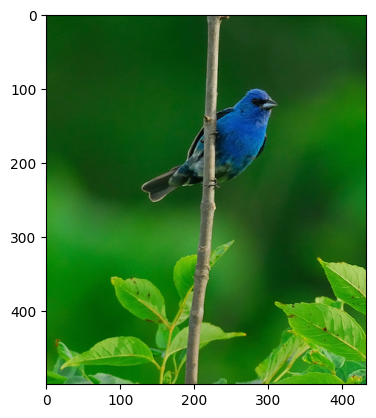

In [4]:
img  = Image.open('/content/n01537544_indigo_bunting.JPEG')
imgplot = plt.imshow(img)
plt.show()

In [5]:
preprocess = weights.transforms()
input_tensor = preprocess(img).unsqueeze(0).to(device)

In [10]:
prediction = model(input_tensor).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
print(class_id)
score = prediction[class_id].item()
category = weights.meta['categories'][class_id]
print(f"{category}: {100 * score:.1f}%")

17
jay: 0.4%


In [7]:
eps = 0.01
criterion = nn.CrossEntropyLoss()
model.train()
delta = torch.zeros_like(input_tensor, requires_grad=True)
prediction = model(input_tensor + delta)
loss = criterion(prediction, torch.tensor(class_id).unsqueeze(0))
loss.backward()
grad_data = torch.sign(delta.grad.detach())

adv_tensor = input_tensor + eps*grad_data

902
whistle: 0.3%


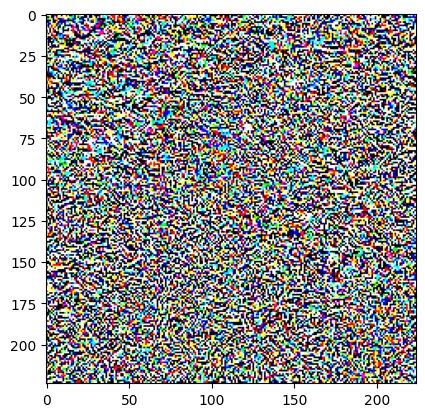

In [9]:
prediction = model(adv_tensor).squeeze(0).softmax(0)
class_id = prediction.argmax().item()
print(class_id)
score = prediction[class_id].item()
category = weights.meta['categories'][class_id]
print(f"{category}: {100 * score:.1f}%")
plt.imshow((grad_data).squeeze(0).permute(1, 2, 0) )